In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('Data/Final/X_train_sc.csv')
X_test = pd.read_csv('Data/Final/X_test_sc.csv')
y_train = pd.read_csv('Data/Final/y_train_sc.csv')
y_test = pd.read_csv('Data/Final/y_test_sc.csv')

In [3]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31324, 12), (16868, 12), (31324, 1), (16868, 1))

In [4]:
import pickle

In [5]:
## Loading scaler

sc_X = pickle.load(open('Data/X_scaler.pkl', 'rb'))
sc_y= pickle.load(open('Data/y_scaler.pkl', 'rb'))

## LinearRegression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
train_pred = regressor.predict(X_train)
test_pred = regressor.predict(X_test)

In [9]:
train_pred.shape,test_pred.shape

((31324, 1), (16868, 1))

In [10]:
t_X_train = sc_X.inverse_transform(X_train)
t_y_train = sc_y.inverse_transform(y_train)
t_X_test = sc_X.inverse_transform(X_test)
t_y_test = sc_y.inverse_transform(y_test)

t_train_pred = sc_y.inverse_transform(train_pred)
t_test_pred = sc_y.inverse_transform(test_pred)

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('-------Train----------')
print('MAE: ',mean_absolute_error(t_y_train,t_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_train,t_train_pred)))
print('R2 Score: ',r2_score(t_y_train,t_train_pred))

print('-------------------------------')

print('-------Test----------')
print('MAE: ',mean_absolute_error(t_y_test,t_test_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_test,t_test_pred)))
print('R2 Score: ',r2_score(t_y_test,t_test_pred))

-------Train----------
MAE:  32.05591173270508
RMSE:  51.01206196994659
R2 Score:  0.1566225099677141
-------------------------------
-------Test----------
MAE:  16.450113660458758
RMSE:  19.947644760798454
R2 Score:  0.5061958697352493


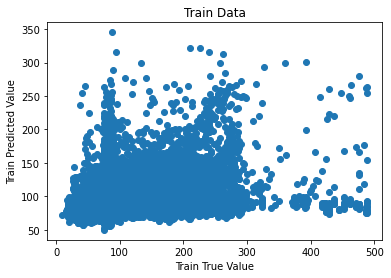

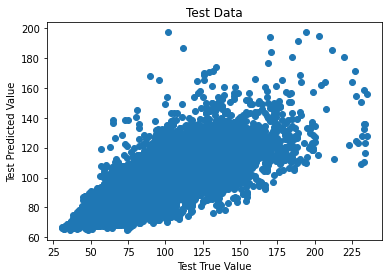

In [13]:
## Plotting the preds with true results

plt.scatter(t_y_train,t_train_pred)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,t_test_pred)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

In [14]:
file = open('Data/Models/linear_regression.pkl','wb')

pickle.dump(regressor,file)

## Lasso Regression

In [15]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import Lasso

In [41]:
lasso = Lasso()
parameters = {
    'alpha':[1e-15,1e-14,1e-13,1e-11,1e-10,1e-8,1e-3,1e-2,1,2,5,10,15,17,19,20,22,25,28,30,32,34,36]
}

lasso_regressor = GridSearchCV(lasso,
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-14, 1e-13, 1e-11, 1e-10, 1e-08,
                                   0.001, 0.01, 1, 2, 5, 10, 15, 17, 19, 20, 22,
                                   25, 28, 30, 32, 34, 36]},
             scoring='neg_mean_squared_error')

In [42]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [43]:
train_pred = lasso_regressor.predict(X_train)
test_pred = lasso_regressor.predict(X_test)

In [44]:
train_pred.shape,test_pred.shape

((31324,), (16868,))

In [45]:
t_X_train = sc_X.inverse_transform(X_train)
t_y_train = sc_y.inverse_transform(y_train)
t_X_test = sc_X.inverse_transform(X_test)
t_y_test = sc_y.inverse_transform(y_test)

t_train_pred = sc_y.inverse_transform(train_pred.reshape(-1,1))
t_test_pred = sc_y.inverse_transform(test_pred.reshape(-1,1))

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('-------Train----------')
print('MAE: ',mean_absolute_error(t_y_train,t_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_train,t_train_pred)))
print('R2 Score: ',r2_score(t_y_train,t_train_pred))

print('-------------------------------')

print('-------Test----------')
print('MAE: ',mean_absolute_error(t_y_test,t_test_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_test,t_test_pred)))
print('R2 Score: ',r2_score(t_y_test,t_test_pred))

-------Train----------
MAE:  35.63368171481022
RMSE:  53.15789932148511
R2 Score:  0.08417631979746187
-------------------------------
-------Test----------
MAE:  21.403201147600345
RMSE:  25.724229505239993
R2 Score:  0.17878623855817433


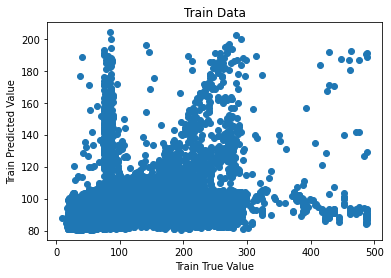

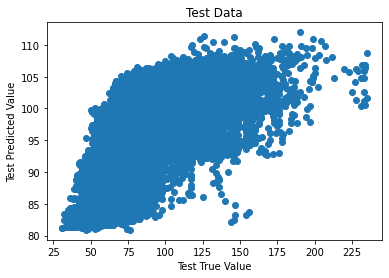

In [47]:
## Plotting the preds with true results

plt.scatter(t_y_train,t_train_pred)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,t_test_pred)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

In [48]:
file = open('Data/Models/lasso_regression.pkl','wb')

pickle.dump(lasso_regressor,file)

## Ridge Regressor

In [49]:
from sklearn.linear_model import Ridge

In [50]:
ridge = Ridge()
parameters = {
    'alpha':[1e-15,1e-14,1e-13,1e-11,1e-10,1e-8,1e-3,1e-2,1,2,5,10,15,17,19,20,22,25,28,30,32,34,36]
}

ridge_regressor = GridSearchCV(ridge,
                               param_grid=parameters,
                               scoring='neg_mean_squared_error',
                               cv=5)

ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-14, 1e-13, 1e-11, 1e-10, 1e-08,
                                   0.001, 0.01, 1, 2, 5, 10, 15, 17, 19, 20, 22,
                                   25, 28, 30, 32, 34, 36]},
             scoring='neg_mean_squared_error')

In [51]:
ridge_regressor.best_params_

{'alpha': 36}

In [52]:
train_pred = ridge_regressor.predict(X_train)
test_pred = ridge_regressor.predict(X_test)

In [53]:
train_pred.shape,test_pred.shape

((31324, 1), (16868, 1))

In [54]:
t_X_train = sc_X.inverse_transform(X_train)
t_y_train = sc_y.inverse_transform(y_train)
t_X_test = sc_X.inverse_transform(X_test)
t_y_test = sc_y.inverse_transform(y_test)

t_train_pred = sc_y.inverse_transform(train_pred.reshape(-1,1))
t_test_pred = sc_y.inverse_transform(test_pred.reshape(-1,1))

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('-------Train----------')
print('MAE: ',mean_absolute_error(t_y_train,t_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_train,t_train_pred)))
print('R2 Score: ',r2_score(t_y_train,t_train_pred))

print('-------------------------------')

print('-------Test----------')
print('MAE: ',mean_absolute_error(t_y_test,t_test_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_test,t_test_pred)))
print('R2 Score: ',r2_score(t_y_test,t_test_pred))

-------Train----------
MAE:  32.90797152177598
RMSE:  51.34069433023572
R2 Score:  0.14572101354403577
-------------------------------
-------Test----------
MAE:  17.534251128195347
RMSE:  21.123723191587768
R2 Score:  0.44625170399750513


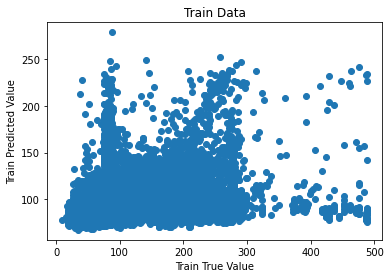

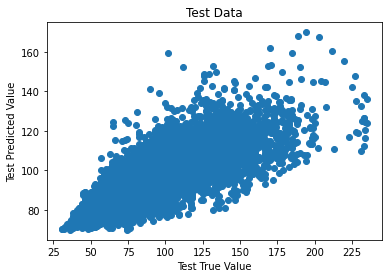

In [56]:
## Plotting the preds with true results

plt.scatter(t_y_train,t_train_pred)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,t_test_pred)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

In [57]:
file = open('Data/Models/ridge_regression.pkl','wb')

pickle.dump(ridge_regressor,file)

## Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
params = {
    'criterion' : ['mse','friedman_mse'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
    'min_samples_leaf' : [1,2,3,4,5,6],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto','sqrt','log2',None],
    'max_leaf_nodes' : [None,5,10,20,30,40,50,60,70]
}

dtree_regressor = RandomizedSearchCV(DecisionTreeRegressor(),
                               param_distributions=params,
                               scoring='neg_mean_squared_error',
                               cv=3,
                               n_iter=1500,
                               n_jobs=-1,
                               verbose=1)

dtree_regressor.fit(X_train,y_train)

print(dtree_regressor.best_params_)
print(dtree_regressor.best_score_)

Fitting 3 folds for each of 1500 candidates, totalling 4500 fits
{'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 4, 'max_leaf_nodes': 5, 'max_features': 'sqrt', 'max_depth': 14, 'criterion': 'mse'}
-0.012475714742155758


In [78]:
train_pred = dtree_regressor.predict(X_train)
test_pred = dtree_regressor.predict(X_test)

In [79]:
t_X_train = sc_X.inverse_transform(X_train)
t_y_train = sc_y.inverse_transform(y_train)
t_X_test = sc_X.inverse_transform(X_test)
t_y_test = sc_y.inverse_transform(y_test)

t_train_pred = sc_y.inverse_transform(train_pred.reshape(-1,1))
t_test_pred = sc_y.inverse_transform(test_pred.reshape(-1,1))

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('-------Train----------')
print('MAE: ',mean_absolute_error(t_y_train,t_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_train,t_train_pred)))
print('R2 Score: ',r2_score(t_y_train,t_train_pred))

print('-------------------------------')

print('-------Test----------')
print('MAE: ',mean_absolute_error(t_y_test,t_test_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_test,t_test_pred)))
print('R2 Score: ',r2_score(t_y_test,t_test_pred))

-------Train----------
MAE:  34.27273629056577
RMSE:  52.20610135132163
R2 Score:  0.11667855845390218
-------------------------------
-------Test----------
MAE:  19.471204898900027
RMSE:  23.768136588738297
R2 Score:  0.29892943004023786


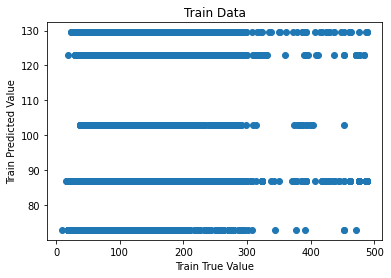

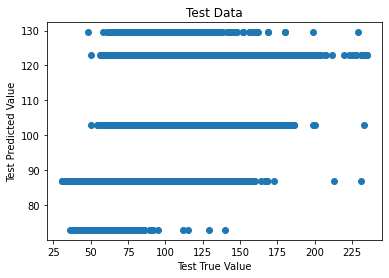

In [81]:
## Plotting the preds with true results

plt.scatter(t_y_train,t_train_pred)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,t_test_pred)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

<AxesSubplot:ylabel='Count'>

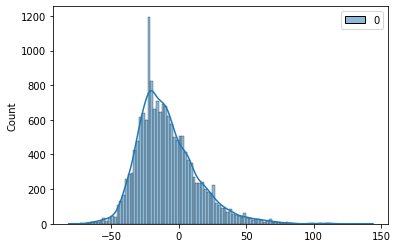

In [84]:
sns.histplot(t_y_test-t_test_pred,kde=True)

In [85]:
file = open('Data/Models/dtree_regression.pkl','wb')

pickle.dump(dtree_regressor,file)

## XGBoost

In [86]:
from xgboost import XGBRegressor

In [89]:
### Hypertuning

params = {
    'n_estimators' : [70,100,120,150,175,200,250,300],
    'max_depth' : [2,3,4,5,6,7,10,11,14,15,17],
    'learning_rate' : [0.001,0.01,0.1,0.5,1.,5.],
    'gamma' : [None,0.001,0.01,0.1,1.,2.,5.],
    'subsample' : [0.6,0.7,0.8,0.9],
    'min_child_weight' : [3,4,5,6,7,8]
}

xgb = XGBRegressor()

xgb_regressor = RandomizedSearchCV(xgb,
                               param_distributions=params,
                               n_iter=30,
                               scoring='neg_mean_squared_error',
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

xgb_regressor.fit(X_train,y_train)

print(xgb_regressor.best_params_)
print(xgb_regressor.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


D:\My_Installed_Soft\Anacondaa\envs\Air Quality\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.01325147 -0.01484741 -0.09641811 -0.01665628 -0.01311727 -0.01315103
         nan -0.01216847 -0.01357852 -0.02760337 -0.09310884 -0.01339782
 -0.03342807 -0.01741882 -0.01259405         nan -0.01312917         nan
 -0.08834016         nan -0.10181951 -0.10161311 -0.10166038         nan
 -0.08473888 -0.01255329 -0.01296825         nan -0.01628361         nan]
  warnings.warn(


{'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': None}
-0.012168468048266596


In [90]:
xgb = XGBRegressor(**xgb_regressor.best_params_)

In [92]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

In [94]:
t_X_train = sc_X.inverse_transform(X_train)
t_y_train = sc_y.inverse_transform(y_train)
t_X_test = sc_X.inverse_transform(X_test)
t_y_test = sc_y.inverse_transform(y_test)

t_train_pred = sc_y.inverse_transform(train_pred.reshape(-1,1))
t_test_pred = sc_y.inverse_transform(test_pred.reshape(-1,1))

In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('-------Train----------')
print('MAE: ',mean_absolute_error(t_y_train,t_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_train,t_train_pred)))
print('R2 Score: ',r2_score(t_y_train,t_train_pred))

print('-------------------------------')

print('-------Test----------')
print('MAE: ',mean_absolute_error(t_y_test,t_test_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_test,t_test_pred)))
print('R2 Score: ',r2_score(t_y_test,t_test_pred))

-------Train----------
MAE:  27.94945329396513
RMSE:  45.21286059115029
R2 Score:  0.3374781298273166
-------------------------------
-------Test----------
MAE:  15.995429176274492
RMSE:  20.093653483620187
R2 Score:  0.498940518873786


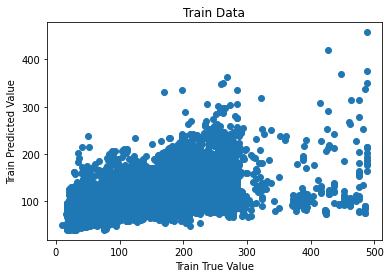

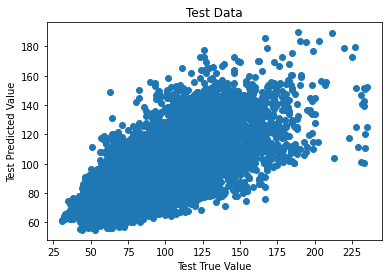

In [96]:
## Plotting the preds with true results

plt.scatter(t_y_train,t_train_pred)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,t_test_pred)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

In [105]:
file = open('Data/Models/xgb_regression.pkl','wb')

pickle.dump(xgb,file)

## SVM

In [106]:
from sklearn.svm import SVR

In [108]:
### Hypertuning

params = {
    'gamma' : ['scale','auto'],
    'C' : [0.001,0.01,0.1,0.5,1.,5.,10,50]
}

svm_regressor = RandomizedSearchCV(SVR(),
                               param_distributions=params,
                               n_iter=30,
                               scoring='neg_mean_squared_error',
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

svm_regressor.fit(X_train,y_train)

print(svm_regressor.best_params_)
print(svm_regressor.best_score_)

D:\My_Installed_Soft\Anacondaa\envs\Air Quality\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 16 is smaller than n_iter=30. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits


D:\My_Installed_Soft\Anacondaa\envs\Air Quality\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'gamma': 'auto', 'C': 0.1}
-0.01268262233771048


In [110]:
svm = SVR(**svm_regressor.best_params_)

In [113]:
svm.fit(X_train,np.array(y_train).ravel())

SVR(C=0.1, gamma='auto')

In [114]:
train_pred = svm.predict(X_train)
test_pred = svm.predict(X_test)

In [115]:
t_X_train = sc_X.inverse_transform(X_train)
t_y_train = sc_y.inverse_transform(y_train)
t_X_test = sc_X.inverse_transform(X_test)
t_y_test = sc_y.inverse_transform(y_test)

t_train_pred = sc_y.inverse_transform(train_pred.reshape(-1,1))
t_test_pred = sc_y.inverse_transform(test_pred.reshape(-1,1))

In [116]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('-------Train----------')
print('MAE: ',mean_absolute_error(t_y_train,t_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_train,t_train_pred)))
print('R2 Score: ',r2_score(t_y_train,t_train_pred))

print('-------------------------------')

print('-------Test----------')
print('MAE: ',mean_absolute_error(t_y_test,t_test_pred))
print('RMSE: ',np.sqrt(mean_squared_error(t_y_test,t_test_pred)))
print('R2 Score: ',r2_score(t_y_test,t_test_pred))

-------Train----------
MAE:  36.583936230067266
RMSE:  52.00096780975572
R2 Score:  0.12360659400706941
-------------------------------
-------Test----------
MAE:  21.316380767180487
RMSE:  24.33743853600054
R2 Score:  0.26494268702147517


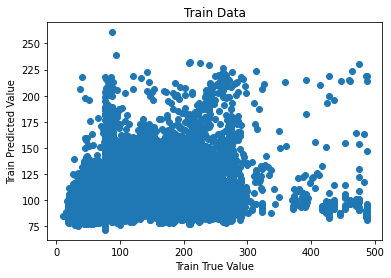

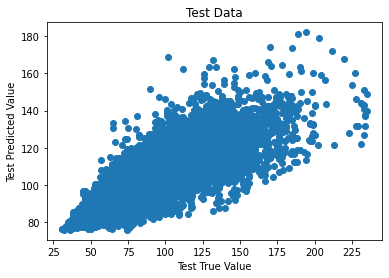

In [117]:
## Plotting the preds with true results

plt.scatter(t_y_train,t_train_pred)
plt.title('Train Data')
plt.xlabel('Train True Value')
plt.ylabel('Train Predicted Value')
plt.show()

plt.scatter(t_y_test,t_test_pred)
plt.title('Test Data')
plt.xlabel('Test True Value')
plt.ylabel('Test Predicted Value')
plt.show()

In [118]:
file = open('Data/Models/svm_regression.pkl','wb')

pickle.dump(svm,file)